# SDEs with ModelingToolkit.jl

Define a stochastic Lorentz system using `SDESystem(equations, noises, iv, dv, ps)`.

Add a diagonal noise with 10% of the magnitude, using a Brownian variable (`@brownian x`).

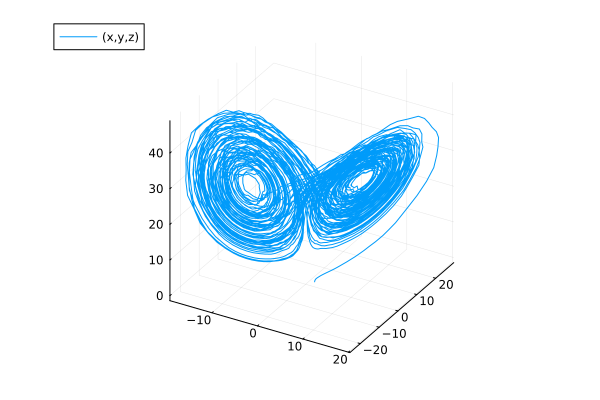

In [1]:
using ModelingToolkit
using StochasticDiffEq
using Plots

@parameters σ ρ β
@independent_variables t
@variables x(t) y(t) z(t)
@brownian a
D = Differential(t)

eqs = [
    D(x) ~ σ * (y - x) + 0.1a * x,
    D(y) ~ x * (ρ - z) - y + 0.1a * y,
    D(z) ~ x * y - β * z + 0.1a * z
]

@mtkbuild de = System(eqs, t)

ics = [
    x => 2.0,
    y => 0.0,
    z => 0.0
]

ps = [
    σ => 10.0,
    β => 8/3,
    ρ => 28.0
]

tspan = (0.0, 100.0)

prob = SDEProblem(de, ics, tspan, ps);
sol = solve(prob, LambaEulerHeun())
plot(sol, idxs=(x, y, z))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*